In [1]:
#!/usr/bin/env conda run -n datimacchinaenv python

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [4]:
from matplotlib.animation import FuncAnimation

In [5]:
import glob
from PIL import Image
from images2gif import writeGif  # requires --> (datimacchinaenv) pip install images2gif

#####   important before to start do the same change to the package images2gif   ###########

#       manually change the two import statements in your already installed package (in __init__.py):

#       -from images2gif import readGif as readGif
#       -from images2gif import writeGif as writeGif
#       +from .images2gif import readGif as readGif
#       +from .images2gif import writeGif as writeGif



import IPython.display as IPdisplay

In [6]:
import shutil

In [7]:
# per matrice correlazione
import seaborn as sns
# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

In [8]:
import matplotlib.tri as mtri

In [9]:
import h5py

In [10]:
path = os.getcwd()+'\\DATA\\20200107'

files = []
filespath = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if r'MERGE' in file:
            files.append(file)
            filespath.append(os.path.join(r, file))
            
# since there is only one file I need only the file name
os.path.join(r, files[0])
files

['GEODATA_S-1048_RAW_20200107_MERGE.xls']

In [11]:
os.path.join(r, files[0])

'C:\\Users\\fpe\\JUPYTER\\datimacchina\\DATA\\20200107\\GEODATA_S-1048_RAW_20200107_MERGE.xls'

In [12]:
dfxls = pd.read_excel(os.path.join(r, files[0]))

#### Drop double columns ending by .1

In [13]:
dfxls.filter(regex='[.]1$')
dfxls = dfxls[dfxls.columns.drop(list(dfxls.filter(regex='[.]1$')))]

###  Create new columns

#### First we create a column that can be detected as date

In [14]:
dfxls['datestamp']=pd.to_datetime(dfxls.Date)
dfxls['timestamp']=dfxls.datestamp.apply(lambda x: int(time.mktime(x.timetuple())))

In [15]:
dfxls.sort_values('timestamp',inplace=True)

#### Then we find the position of relevant indicators

In [16]:
# cerco la posizione del fill level

pos_filllev=int(dfxls.columns.get_loc(dfxls.filter(regex='(?i)fill.*lev.*work.*chamb').columns.tolist()[0]))
pos_stroke=int(dfxls.columns.get_loc(dfxls.filter(regex='(?i)aet.*stroke').columns.tolist()[0]))
pos_p01=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)P0.1)(?=.*(?i)Flow)(?=.*(?i)m³/h).*$').columns.tolist()[0]))
pos_p02=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)P0.2)(?=.*(?i)Flow)(?=.*(?i)m³/h).*$').columns.tolist()[0]))
pos_p03=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)P0.3)(?=.*(?i)Flow)(?=.*(?i)m³/h).*$').columns.tolist()[0]))
pos_p04=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)P0.4)(?=.*(?i)Flow)(?=.*(?i)m³/h).*$').columns.tolist()[0]))
pos_p05=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)P0.5)(?=.*(?i)Flow)(?=.*(?i)m³/h).*$').columns.tolist()[0]))
pos_pos02=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)posit)(?=.*(?i)2)(?=.*(?i)m³/h).*$').columns.tolist()[0]))
pos_pos03=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)posit)(?=.*(?i)3)(?=.*(?i)m³/h).*$').columns.tolist()[0]))
pos_advspeed=int(dfxls.columns.get_loc(dfxls.filter(regex='(?i)Advance.*speed.*').columns.tolist()[0]))
pos_torque=int(dfxls.columns.get_loc(dfxls.filter(regex='(?i)torque.*cutting.*wheel.*').columns.tolist()[0]))
pos_feed=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)flow)(?=.*(?i)feed)(?=.*(?i)m³/h).*$').columns.tolist()[0]))
pos_slurry=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)slurry)(?=.*(?i)line)(?=.*(?i)m³/h).*$').columns.tolist()[0]))
pos_num=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)1048)(?=.*(?i)advance)(?=.*(?i)[-]).*$').columns.tolist()[0]))
pos_prch01=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)chamb)(?=.*(?i)1)(?=.*(?i)bar).*$').columns.tolist()[0]))
pos_prch02=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)chamb)(?=.*(?i)2)(?=.*(?i)bar).*$').columns.tolist()[0]))
pos_prch03=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)chamb)(?=.*(?i)3)(?=.*(?i)bar).*$').columns.tolist()[0]))
pos_prch04=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)chamb)(?=.*(?i)4)(?=.*(?i)bar).*$').columns.tolist()[0]))
pos_prch05=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)chamb)(?=.*(?i)5)(?=.*(?i)bar).*$').columns.tolist()[0]))
pos_prch06=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)chamb)(?=.*(?i)6)(?=.*(?i)bar).*$').columns.tolist()[0]))
pos_prch07=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)chamb)(?=.*(?i)7)(?=.*(?i)bar).*$').columns.tolist()[0]))
pos_prch08=int(dfxls.columns.get_loc(dfxls.filter(regex='^(?=.*(?i)chamb)(?=.*(?i)8)(?=.*(?i)bar).*$').columns.tolist()[0]))
pos_date=int(dfxls.columns.get_loc(dfxls.filter(regex='datestamp').columns.tolist()[0]))





In [17]:
col_list=dfxls.columns.tolist()

## We create new columns

#### Datestamp diff (aa-mm-gg hh-mm-ss)
#### Datestamp diff [h]

In [18]:
dfxls['datestamp_p'] = dfxls.datestamp.shift(1).copy()
# Beign the first row == 0 we need to delete it
#dfxls=dfxls.dropna().copy()

In [19]:
dfxls['datestamp_diff']= dfxls['datestamp']-dfxls['datestamp_p']

In [20]:
dfxls['datestamp_diff[h]'] = dfxls['datestamp_diff'].astype('timedelta64[s]').copy().fillna(0)/3600

#### Differenziali dpressure chambers

In [21]:
np.arange(1,9,1)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [22]:
for i in np.arange(1,9,1):
    dfxls['dpress_ch{}'.format(i)] = dfxls[col_list[pos_prch01+i-1]].diff(periods=1).copy()

#### Creo colonna stroke - delta stroke solo positivi - volumi teorici e volumi teorici cumulati        ['dVol_Teor[m³]']

In [23]:
dfxls['stroke_diff[mm]'] = dfxls[col_list[pos_stroke]].diff(periods=1).copy()
dfxls['stroke_diff[mm]'].fillna(0, inplace=True)
dfxls.loc[dfxls['stroke_diff[mm]'] <0, 'stroke_diff[mm]'] = 0

In [24]:
dfxls['stroke_cum[mm]'] = dfxls['stroke_diff[mm]'].cumsum().shift(-1).fillna(0)

In [25]:
dfxls['stroke_cum_seg[mm]']=0

segm_list = dfxls[col_list[pos_num]].unique().tolist()

for i in segm_list:
    
    dfxls.loc[dfxls[col_list[pos_num]]==i,'stroke_cum_seg[mm]'] = \
    dfxls.loc[dfxls[col_list[pos_num]]==i,'stroke_diff[mm]'].cumsum().shift(-1).fillna(0)

In [26]:
Area_Cutter = 35.59

In [27]:
dfxls['dVol_Teor[m³]'] = dfxls['stroke_diff[mm]']/1000*Area_Cutter

In [28]:
dfxls['Vol_Teor_cum[m³]'] = dfxls['stroke_cum[mm]']/1000*Area_Cutter
dfxls['Vol_Teor_seg_cum[m³]'] = dfxls['stroke_cum_seg[mm]']/1000*Area_Cutter

#### Calcolo di volumi dal Slurry-Feedcorretto * dt           ['dVol_bal_feed_slurry[m³]']

In [29]:
dfxls['feed_adj[m³/h]'] = dfxls[col_list[pos_feed]]-dfxls[col_list[pos_pos02]]-dfxls[col_list[pos_pos03]]

In [30]:
dfxls['bal_feed_slurry[m³/h]']=dfxls[col_list[pos_slurry]]-dfxls['feed_adj[m³/h]']

dfxls['dVol_bal_feed_slurry[m³]']=dfxls['bal_feed_slurry[m³/h]']*dfxls['datestamp_diff[h]']

dfxls['dVol_bal_feed_slurry_cum[m³]']=dfxls['dVol_bal_feed_slurry[m³]'].cumsum().shift(-1).fillna(0)

#### Calcolo volumi dal fill level con formula polinomiale     ['dvol_work_chamb[m³]']

In [31]:
def calcvolume(x):
    vol=-0.113*x**5+0.1236*x**4+0.5462*x**3-0.1059*x**2+5.6112*x+11.794
    if x > 0 : 
        return vol
    elif x < 0 : 
        return vol
    else :
        return 0

In [32]:
dfxls['dfill_level[m]'] = dfxls[col_list[pos_filllev]].diff(periods=1).fillna(0).copy()
dfxls['dvol_work_chamb[m³]'] = dfxls['dfill_level[m]'].map(lambda x: calcvolume(x))

In [33]:
dfxls['dvol_work_chamb_cum[m³]'] = dfxls['dvol_work_chamb[m³]'].cumsum().shift(-1).fillna(0)

#### Calcolo i balance istantanei e totali

In [34]:
dfxls['dbalance_filllev_feedslurry[m³]'] = dfxls['dvol_work_chamb[m³]']+dfxls['dVol_bal_feed_slurry[m³]']

#### Creo la colonna STATE (fulloper,stall_rotating,stall_stand)

In [35]:
dfxls['state']=0
f_min_torq25 = dfxls.iloc[:,pos_torque].describe()[4]
f_min_adv25 = dfxls.iloc[:,pos_advspeed].describe()[4]

dfxls.loc[(dfxls[col_list[pos_torque]]>0) & (dfxls[col_list[pos_advspeed]]>0),'state'] = 'fulloper'
dfxls.loc[(dfxls[col_list[pos_torque]]!=0) & (dfxls[col_list[pos_advspeed]]==0),'state'] = 'stall_rotating'
dfxls.loc[(dfxls[col_list[pos_torque]]==0) & (dfxls[col_list[pos_advspeed]]==0),'state'] = 'stall_stand'

### CREATE col_list for fast individuation of columns

In [36]:
col_list=dfxls.columns.tolist()

In [37]:
col_list[111:]

['datestamp',
 'timestamp',
 'datestamp_p',
 'datestamp_diff',
 'datestamp_diff[h]',
 'dpress_ch1',
 'dpress_ch2',
 'dpress_ch3',
 'dpress_ch4',
 'dpress_ch5',
 'dpress_ch6',
 'dpress_ch7',
 'dpress_ch8',
 'stroke_diff[mm]',
 'stroke_cum[mm]',
 'stroke_cum_seg[mm]',
 'dVol_Teor[m³]',
 'Vol_Teor_cum[m³]',
 'Vol_Teor_seg_cum[m³]',
 'feed_adj[m³/h]',
 'bal_feed_slurry[m³/h]',
 'dVol_bal_feed_slurry[m³]',
 'dVol_bal_feed_slurry_cum[m³]',
 'dfill_level[m]',
 'dvol_work_chamb[m³]',
 'dvol_work_chamb_cum[m³]',
 'dbalance_filllev_feedslurry[m³]',
 'state']

In [38]:
a = 'datestamp_diff'
a.replace(" ",'').split("[")[0]

'datestamp_diff'

In [39]:
ls0 = []
ls1 = []
for i in col_list[111:]:
    
    ls0.append('pos_{}'.format(i.replace(" ",'').split("[")[0]))
    ls1.append(dfxls.columns.get_loc(i))
    
pos_dict = dict(zip(ls0,ls1))   

In [40]:
pos_dict

{'pos_datestamp': 111,
 'pos_timestamp': 112,
 'pos_datestamp_p': 113,
 'pos_datestamp_diff': 115,
 'pos_dpress_ch1': 116,
 'pos_dpress_ch2': 117,
 'pos_dpress_ch3': 118,
 'pos_dpress_ch4': 119,
 'pos_dpress_ch5': 120,
 'pos_dpress_ch6': 121,
 'pos_dpress_ch7': 122,
 'pos_dpress_ch8': 123,
 'pos_stroke_diff': 124,
 'pos_stroke_cum': 125,
 'pos_stroke_cum_seg': 126,
 'pos_dVol_Teor': 127,
 'pos_Vol_Teor_cum': 128,
 'pos_Vol_Teor_seg_cum': 129,
 'pos_feed_adj': 130,
 'pos_bal_feed_slurry': 131,
 'pos_dVol_bal_feed_slurry': 132,
 'pos_dVol_bal_feed_slurry_cum': 133,
 'pos_dfill_level': 134,
 'pos_dvol_work_chamb': 135,
 'pos_dvol_work_chamb_cum': 136,
 'pos_dbalance_filllev_feedslurry': 137,
 'pos_state': 138}

### CREATE  H5 FILE

In [41]:
dfxls.to_hdf('202001_dfxls.h5', key='losses')

In [42]:
# dfxls_prova = pd.read_hdf('202001_dfxls.h5', key='losses')

# try:
#     dfxls_prova.equals(dfxls)
# except:
#     print('are not equal some problems my occur')

# PLOT

### Prepare data

In [43]:
# creo una lista con data, sensori delle camere, fill, 
list_chamb = []
for i in dfxls.filter(regex='Pressure excavation chamber'):
    list_chamb.append(dfxls.columns.get_loc(i))
print('List of chamber columns is:',list_chamb)

list_col = [0]
list_col.extend(list_chamb)
list_col.append(pos_filllev)
print('List of interesting columns',list_col)

List of chamber columns is: [2, 3, 4, 5, 6, 7, 8, 9]
List of interesting columns [0, 2, 3, 4, 5, 6, 7, 8, 9, 32]


In [44]:
# *************************************************

n_sensori = 8
list_x = []
list_z = []
for i in np.arange(0,n_sensori,1):
    x = 1 * np.sin(2*np.pi/8*i)
    list_x.append(x)
    z = 1 * np.cos(2*np.pi/8*i)
    list_z.append(z)

# PLOT SUPER

In [45]:
dfxlscopy = dfxls.copy()     

In [46]:
num_dati = -1   # -1   ## fino a ultima riga

dfxls = dfxlscopy.iloc[:num_dati,:].reset_index(drop=True)

# df solo per cell press e fill

df = dfxls.iloc[:num_dati,list_col]

n_row = df.shape[0]

In [47]:
dfxlscopy

,Date,S-1048_ADVANCE_ADVANCE_NO [-],Pressure excavation chamber 1 [bar],Pressure excavation chamber 2 [bar],Pressure excavation chamber 3 [bar],Pressure excavation chamber 4 [bar],Pressure excavation chamber 5 [bar],Pressure excavation chamber 6 [bar],Pressure excavation chamber 7 [bar],Pressure excavation chamber 8 [bar],...,Vol_Teor_seg_cum[m³],feed_adj[m³/h],bal_feed_slurry[m³/h],dVol_bal_feed_slurry[m³],dVol_bal_feed_slurry_cum[m³],dfill_level[m],dvol_work_chamb[m³],dvol_work_chamb_cum[m³],dbalance_filllev_feedslurry[m³],state
0,2020-01-07 07:00:00,4201,1.814,2.000,2.105,2.262,2.287,2.112,1.821,1.707,...,0.0,0.000,0.000,0.0000,-0.00060,0.000,0.000000,11.782777,0.000000,stall_stand
1,2020-01-07 07:00:30,4201,1.814,2.000,2.105,2.262,2.287,2.112,1.824,1.707,...,0.0,0.072,-0.072,-0.0006,-0.00120,-0.002,11.782777,11.782777,11.782177,stall_stand
2,2020-01-07 07:01:00,4201,1.814,2.000,2.102,2.262,2.287,2.112,1.824,1.707,...,0.0,0.072,-0.072,-0.0006,-0.00120,0.000,0.000000,11.782777,-0.000600,stall_stand
3,2020-01-07 07:01:30,4201,1.814,2.000,2.102,2.262,2.287,2.112,1.824,1.707,...,0.0,0.000,0.000,0.0000,-0.00120,0.000,0.000000,11.782777,0.000000,stall_stand
4,2020-01-07 07:02:00,4201,1.814,2.000,2.105,2.262,2.287,2.112,1.821,1.707,...,0.0,0.000,0.000,0.0000,-0.00120,0.000,0.000000,11.782777,0.000000,stall_stand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2020-01-08 06:57:30,4207,1.836,2.011,2.124,2.262,2.279,2.109,1.846,1.715,...,0.0,0.000,0.000,0.0000,2985.36225,0.000,0.000000,22032.861376,0.000000,stall_stand
2876,2020-01-08 06:58:00,4207,1.836,2.011,2.124,2.262,2.282,2.109,1.846,1.715,...,0.0,0.000,0.000,0.0000,2985.36225,-0.001,11.788389,22032.861376,11.788389,stall_stand
2877,2020-01-08 06:58:30,4207,1.833,2.011,2.124,2.262,2.279,2.109,1.846,1.715,...,0.0,0.000,0.000,0.0000,2985.36225,0.000,0.000000,22032.861376,0.000000,stall_stand
2878,2020-01-08 06:59:00,4207,1.833,2.011,2.124,2.262,2.279,2.109,1.846,1.715,...,0.0,0.000,0.000,0.0000,2985.36225,0.000,0.000000,22032.861376,0.000000,stall_stand


In [51]:
#  ************************************************

plt.style.use('dark_background')

save_folder = 'images/gif'
gif_filename = '01'

shutil.rmtree(save_folder, ignore_errors=True)

working_folder = '{}/{}'.format(save_folder, gif_filename)

if not os.path.exists(working_folder):
    os.makedirs(working_folder)

fontdict1={'fontsize': 18,
          'fontweight':0.1,
          'horizontalalignment': 'center'}

fontdict2 = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }

colorstate = {'fulloper':'lime','stall_rotating':'yellow','stall_stand':'red'}
textstate = {'fulloper':'OPERATION','stall_rotating':'ONLY ROTATING','stall_stand':'STOP'}
colorfilllev = {True:'r',False:'b'}
colorbalfs = {True:'r',False:'b'}

cmap_segment = cm.get_cmap('jet')


# Inizializzo le pressioni e lo stroke:


changepoint = 0

nseg = 0
nseg_p = 0

fillev_p = 0

p_ch5_max = 0
p_ch8_max = 0


stroke = 0

vol_teor_cum = 0
vol_teor_cum_p = 0

stroke_cum = 0
stroke_cum_p = 0

bal_fs_sum = 0
bal_fs_sum_p = 0
bal_fs_q = 0

vol_wc_cum = 0
vol_wc_cum_p = 0

advdsp = []
date = []

nframe = 0

###############################################################################################################################


for e in np.arange(1,n_row,1):
    
    if e%2==0:    # creo immagine ogni 10 print
        
        try:
            ax.clear()
            ax0.clear()
            ax1.clear()
            ax2.clear()
            ax3.clear()
            
            
        except:
            pass
        
        
        fig = plt.figure(figsize=(20,20))
        
        
        gs = fig.add_gridspec(5, 2)
        
        
        ##################################  PRIMO GRAFICO


        ax0 = fig.add_subplot(gs[0, :])
        
        
               

        ## 1 rett
        
        if dfxls.iloc[e,pos_num]!= nseg: 
            nseg_p = nseg
            changepoint = 1
            
        if dfxls.iloc[e,pos_num] == nseg: changepoint = 0
        
        nseg = dfxls.iloc[e,pos_num]
        
        ## 2 rett

        p_ch5_act = dfxls.iloc[e,pos_prch05]
        p_ch5_max = max(p_ch5_max,dfxls.iloc[e,pos_prch05])
        p_ch8_act = dfxls.iloc[e,pos_prch08]
        p_ch8_max = max(p_ch8_max,dfxls.iloc[e,pos_prch08])
        
        
        ### 3 rett
        
        feedl = dfxls.iloc[e,pos_dict['pos_feed_adj']]
        slurry = dfxls.iloc[e,pos_slurry]
        
        bal_fs_q = slurry - feedl
        
        bal_fs = dfxls['dVol_bal_feed_slurry[m³]'][e]
        
        if changepoint == 1 : 
            bal_fs_sum_p = bal_fs_sum
            bal_fs_sum = 0  
        bal_fs_sum += bal_fs
        
        
        ### 4 rect
        
        fillev = dfxls.iloc[e,pos_filllev]
        if e!=0: 
            fillev_p = dfxls.iloc[e-1,pos_filllev]
        
        dfillev = dfxls['dfill_level[m]'][e]
        dvolwch = dfxls['dvol_work_chamb[m³]'][e]
        
        if changepoint == 1 : 
            vol_wc_cum_p = vol_wc_cum
            vol_wc_cum = 0                
        vol_wc_cum += dvolwch
        
        ### 5 rect
        
        stroke = dfxls['stroke_diff[mm]'][e]
        
        if changepoint == 1 : 
            stroke_cum_p = stroke_cum
            stroke_cum = 0 
        stroke_cum += stroke
        
        dvolteor = dfxls['dVol_Teor[m³]'][e]
        
        if changepoint == 1 : 
            vol_teor_cum_p = vol_teor_cum
            vol_teor_cum = 0
        vol_teor_cum += dvolteor
        
        
        ###  6 rett 
        
        balancegrout = vol_wc_cum + bal_fs_sum
        balancetot = balancegrout - vol_teor_cum
        
        balancegrout_p = vol_wc_cum_p + bal_fs_sum_p
        balancetot_p = balancegrout_p - vol_teor_cum_p       
        
            
        rectangles = {'Info1' : mpl.patches.Rectangle((0,1), 4, 2, color=cmap_segment(dfxls.iloc[e,pos_num]%10)),
              'Info2'  : mpl.patches.Rectangle((0,4), 4, 6, color=colorstate[dfxls.state[e]]),
              'Info3'   : mpl.patches.Rectangle((5,1), 4, 2, color='grey'),
              'Info4'  : mpl.patches.Rectangle((5,4), 4, 6, color='grey'),
              'Info5' : mpl.patches.Rectangle((10,1), 4, 2, color=colorbalfs[bal_fs<0]),
              'Info6'  : mpl.patches.Rectangle((10,4), 4, 6, color=colorbalfs[bal_fs_q<0]),
              'Info7'   : mpl.patches.Rectangle((15,1), 4, 2, color=colorbalfs[vol_wc_cum<0]),
              'Info8'  : mpl.patches.Rectangle((15,4), 4, 6, color=colorbalfs[bal_fs<0]),
              'Info9'   : mpl.patches.Rectangle((20,1), 4, 4, color=colorstate[dfxls.state[e]]),
              'Info10'  : mpl.patches.Rectangle((20,6), 4, 4, color=colorstate[dfxls.state[e]]),
              'Info11'   : mpl.patches.Rectangle((25,1), 4, 4, color=colorbalfs[balancetot<0]),
              'Info12'  : mpl.patches.Rectangle((25,6), 4, 4, color=colorbalfs[balancetot_p<0])}
        
        
        dict1 = {'Info1': 'Segment {}'.format(nseg),
                 'Info2': '{}'.format(dfxls.state[e]),
                 'Info3': 'P ch8:{} bar\nP ch5:{} bar'.format(p_ch8_act,p_ch5_act),
                 'Info4': 'Max P ch8:\n{} bar\nMax P ch5:\n{} bar'.format(p_ch8_max,p_ch5_max),
                 'Info5': 'Volcum:{:.2f}[m³]'.format(bal_fs_sum),
                 'Info6': 'Feed:\n{:.2f}[m³/h]\nSlurry\n{:.2f}[m³/h]\nDiff:{:.1f}[m³/h]\nDiff:{:.1f}[m³]'.format(feedl,slurry,bal_fs_q,bal_fs),
                 'Info7': 'Volcum:{:.2f}[m³]'.format(vol_wc_cum),
                 'Info8': 'Fill level:\n{:.2f}[m]\nFill lev pre\n{:.2f}[m]\nDiff:{:.1f}[m]\nDiff:{:.1f}[m³]'.format(fillev,fillev_p,dfillev,dvolwch),
                 'Info9': 'Stroke:{:.2f}[mm]\n Volcum:{:.2f}[m³]'.format(stroke_cum, vol_teor_cum),
                 'Info10': 'dStroke:{:.2f}[mm]\n dVol:{:.2f}[m³]'.format(stroke , dvolteor), 
                 'Info11': 'Bal grout\n:{:.2f}[m³]\n BAL TOT\n:{:.2f}[m³]'.format(balancegrout, balancetot),
                 'Info12': 'Prev segm:{}[-]\n BAL TOT PREV:\n{:.2f}[m³]'.format(nseg_p, balancetot_p),
                }





        for r in rectangles:
            ax0.add_artist(rectangles[r])
            rx, ry = rectangles[r].get_xy()
            cx = rx + rectangles[r].get_width()/2.0
            cy = ry + rectangles[r].get_height()/2.0

            ax0.annotate(dict1[r], (cx, cy), color='w', weight='bold', 
                        fontsize=14, ha='center', va='center')

        ax0.set_xlim((0, 30))
        ax0.set_ylim((0, 11))
        # ax0.set_aspect('equal')

        ax0.axis('off')
        
        
        ##################################  PRIMO GRAFICO ****************************************
        
        ax = fig.add_subplot(gs[1:3, 0], projection='3d')
        ax1 = fig.add_subplot(gs[1:3, 1], projection='3d')
        


        ax.set_xlabel("x")
        ax.set_ylabel("y") 
        ax.set_zlabel("z")

        ax.view_init(45, -45) # rotazione della vista 3d

        ax.set_xlim3d([-1,1])
        ax.set_ylim3d([3,0]) # same as saying to invert it 
        ax.set_zlim3d([-1,1]) 
        
        # Strech the graph
        ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 1.1, 1.0, 1]))

        #######      *********


        ax.set_xlabel('x'),ax.set_ylabel('Pressure [bar]'),ax.set_zlabel('y')

        n_row = df.shape[0]

        for i in np.arange(0,n_sensori,1):

            x_ = list_x[i]
            z_ = list_z[i]
            y_ = df.iloc[e,i+1]
             

            # Plotto una barra per volta
            ax.bar3d(x_, y_, z_, dx=0.2, dz=0.2, dy=(0-y_),
                    color='deepskyblue')
            
        x1_ = 0
        z1_ = 0
        y1_ = dfxls.iloc[e, pos_p02]/100
            
        ax.bar3d(x1_, y1_, z1_, dx=0.2, dz=0.2, dy=(0-y1_), color='red')    
            
            

        # Plotto la barra rossa FILL LEVEL    ********************************************************
        
        z1_ = dfxls.iloc[e,pos_filllev]
        
        ax1.bar3d(-1, 0, z1_, dx=2, dy=0.5, dz=(-2-z1_),
                    color = colorfilllev[dfxls.iloc[e,pos_filllev]<-1.8])  
        


        x1_ = 0.5
        z1_ = 3
        y1_ = dfxls.iloc[e, pos_p01]/100
        ax1.bar3d(x1_, y1_, z1_, dx=0.2, dz=0.2, dy=(0-y1_), color='red')       
        
        x1_ = -0.5
        z1_ = 3
        y1_ = dfxls.iloc[e, pos_p05]/100
        ax1.bar3d(x1_, y1_, z1_, dx=0.2, dz=0.2, dy=(0-y1_), color='red')  
        
        ax1.set_xlim3d(-1,1)
        ax1.set_ylim3d(2,0) # same as saying to invert it 
        ax1.set_zlim3d(-2,3) 
        
        
        
        ax.text2D(0.05, 0.99, str(df.iloc[e,0]), transform=ax.transAxes, fontdict = fontdict2)

        ax.text2D(0, -0.3, str('Pressure chamber[bar]\nP0.2[m³/h/100]'), transform=ax.transAxes, fontdict = fontdict2)
        
        
        
        ax1.text2D(1.5, -0.3, str('Fill Level[m]\nP0.1,P0.5[m³/h/100]'), transform=ax.transAxes, fontdict = fontdict2)       
        
        
        
        ##################################  ULTIMO GRAFICO ##################################################
        
        
        ax3 = fig.add_subplot(gs[4, :])
        
            
        advdsp.append(dfxls['stroke_cum_seg[mm]'][e])
        date.append(dfxls['datestamp'][e])
        
        ax3.plot(date,advdsp, label='stroke_cum_seg[mm]')
        
        ax3.xlim = (dfxls.datestamp.min(),dfxls.datestamp.max())
        ax3.ylim = (dfxls['stroke_cum_seg[mm]'].min(),dfxls['stroke_cum_seg[mm]'].max())
        
        ax3.legend()


        ##################################  SALVA IMMAGINE ##################################################
        
        nframe +=1

        plt.savefig('{}/{}/img_{:04d}.png'.format(save_folder, gif_filename, nframe))  
    
        # don't display the static plot...
        plt.close()


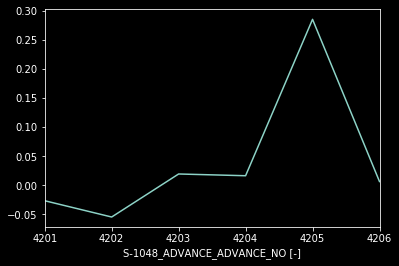

In [68]:
dfxls[dfxls.state=='fulloper'].groupby(col_list[pos_num]).agg([np.sum,np.mean,np.max,np.min])['dpress_ch1']['sum'].plot()

In [60]:
dfxls[dfxls.state=='fulloper'].groupby(col_list[pos_num]).agg([np.sum,np.mean,np.max,np.min])['stroke_diff[mm]']

,sum,mean,amax,amin
S-1048_ADVANCE_ADVANCE_NO [-],,,,
4201,1398.0,25.888889,30.0,0.0
4202,1739.0,24.842857,30.0,0.0
4203,1560.0,23.283582,27.0,0.0
4204,1357.0,23.000000,27.0,0.0
4205,1766.0,23.236842,26.0,0.0
4206,1573.0,23.477612,27.0,0.0


In [ ]:
# load all the static images into a list then save as an animated gif
gif_filepath = '{}/{}.gif'.format(save_folder, gif_filename)


images = []
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(working_folder))]
gif = images[0]
gif.info['duration'] = 400 #milliseconds per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
append_images=[]
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

In [ ]:
import cv2
import os

os.chdir('C:\\Users\\fpe\\JUPYTER\\datimacchina')
save_folder = 'images/gif'
gif_filename = '01'

image_folder = '{}/{}'.format(save_folder, gif_filename)  # 'images/gif/01'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, fps=4, frameSize=(width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [ ]:
gif_filepath = '{}/{}.gif?{}'.format(save_folder, gif_filename,randint(1, 100))   # ?1  serve per permettere l'update
IPdisplay.Image(url=gif_filepath)

In [ ]:
os.getcwd()

In [ ]:
max(5,6)

In [ ]:
np.arange(0,n_sensori,1)

In [ ]:
# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111)

y_=[]

e = 100

for i in np.arange(0,n_sensori,1):  # array([0, 1, 2, 3, 4, 5, 6, 7])
    
    y_.append(float(df.iloc[e,i+1]))
   
xc=[]
zc=[]

for i in np.linspace(0,359,360):
    
    xc.append(0.5*np.sin(np.deg2rad(i)))
    zc.append(0.5*np.cos(np.deg2rad(i)))
    
    xc.append(1.5*np.sin(np.deg2rad(i)))
    zc.append(1.5*np.cos(np.deg2rad(i)))
    
    

x_ = list_x.copy()
z_ = list_z.copy()

x_.extend((np.ones(21)*2).tolist())
z_.extend(np.linspace(-2,2,21).tolist())

x_.extend((np.ones(21)*-2).tolist())
z_.extend(np.linspace(-2,2,21).tolist())

x_.extend(np.linspace(-1.9,1.9,19).tolist())
z_.extend((np.ones(19)*2).tolist())

x_.extend(np.linspace(-1.9,1.9,19).tolist())
z_.extend((np.ones(19)*-2).tolist())

x_.extend(xc)
z_.extend(zc)

y_.extend(np.zeros(80+720).tolist())



In [ ]:
len(X)

In [ ]:
X,Z = np.meshgrid(x_, z_, sparse=True)

In [ ]:
from scipy.interpolate import griddata
Ti = griddata((x_, z_), y_, (X, Z), method='cubic')

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.contourf(X, Y, Ti)

In [ ]:
import matplotlib.tri as mtri
triang = mtri.Triangulation(x_, z_)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.triplot(triang, c="#D3D3D3", marker='.', markerfacecolor="#DC143C", markeredgecolor="black", markersize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [ ]:
triang.y

In [ ]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_trisurf(triang.y, triang.x, y_, cmap='Blues')

ax.view_init(elev=50, azim=45)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.contourf(triang.y, triang.x, np.array(y_), cmap='Blues')

In [ ]:
dfxls.columns.tolist()

In [ ]:
#dfg = dfxls.iloc[:,[2,4,6,9,10,11,19,20,22,26,27,30,32,33,34,37,50,51]]
dfg = dfxls.iloc[:,[2,4,6,9,10,11,19,20,22,26,27,30,32]]
dfg.columns

In [ ]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 20)
    
plt.style.use('seaborn-pastel')   
sns.set_style("white")
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

fig = plt.figure(figsize=(30,30))
sns.set(rc={'figure.figsize':(30,30)})


# Pair grid set up
g = sns.PairGrid(dfg)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'b')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

plt.savefig('{}/{}/img_{}.png'.format(save_folder, gif_filename, 'corr_matrix'))

## Creo una funzione per plottare in automatico il multigrafico di correlazione

In [ ]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 20)

def corrgraph(dfg, nomefile):
    # Function to create graph correlation matrix

    plt.style.use('seaborn-pastel')   
    sns.set_style("white")

    cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                                 hue = 0.5, as_cmap=True)

    sns.set_context(font_scale=2)

    fig = plt.figure(figsize=(30,30))
    sns.set(rc={'figure.figsize':(30,30)})


    # Pair grid set up
    g = sns.PairGrid(dfg)

    # Scatter plot on the upper triangle
    g.map_upper(plt.scatter, s=10, color = 'b')

    # Distribution on the diagonal
    g.map_diag(sns.distplot, kde=False, color = 'red')

    # Density Plot and Correlation coefficients on the lower triangle
    g.map_lower(sns.kdeplot, cmap = cmap)
    g.map_lower(corrfunc);

    plt.savefig('{}/{}/img_{}.png'.format(save_folder, gif_filename, nomefile))

### Plotto il multigrafico per i dati delle pressure chamber e il Fill level

In [ ]:
dfg=dfxls.filter(regex='(Pressure excavation chamber|Fill level)')

col_ls = dfg.columns.tolist()
col_ls = list(map(lambda x: str.replace(x,"Pressure excavation chamber ","Pr_Ex_Ch_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Fill level working chamber","Fill_Lev_WCh"),col_ls))
dfg.columns = col_ls

In [ ]:
corrgraph(dfg, 'corr_2')

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
corr = dfg.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [ ]:
#  Seleziono colonne utili

dfg=dfxls.filter(regex='(Pressure excavation chamber 5|Pressure excavation chamber 8|Fill level|grout injection pressure|\
grout injection amount|grout injection flow|Air Flow in Normal)')

# Semplifico il nome delle colonne
col_ls = dfg.columns.tolist()
col_ls = list(map(lambda x: str.replace(x,"Pressure excavation chamber ","Pr_Ex_Ch_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Fill level working chamber","Fill_Lev_WCh"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Air Flow in Normal m3/min","Air_Flow_in"),col_ls))
col_ls = list(map(lambda x: str.replace(x," grout injection ","_Gr_in_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"pressure","Pr"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Line ","L_"),col_ls))
dfg.columns = col_ls

# Verifico i risultati dell'operazione
col_ls

In [ ]:
corrgraph(dfg, 'corr_2')

In [ ]:
#  Seleziono colonne utili

dfg=dfxls.filter(regex='(Pressure excavation chamber 5|Pressure excavation chamber 8|Fill level|grout injection pressure|\
Line 1 grout injection amount|Line 1 grout injection flow)')

# Semplifico il nome delle colonne
col_ls = dfg.columns.tolist()
col_ls = list(map(lambda x: str.replace(x,"Pressure excavation chamber ","Pr_Ex_Ch_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Fill level working chamber","Fill_Lev_WCh"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Air Flow in Normal m3/min","Air_Flow_in"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Line 1 grout injection ","L1_Gr_in_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"pressure","Pr"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Line ","L_"),col_ls))
dfg.columns = col_ls

# Verifico i risultati dell'operazione
col_ls

In [ ]:
corrgraph(dfg, 'corr_2')

In [ ]:
import scipy.stats as st
import statsmodels as sm
import matplotlib as mpl
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
#matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=10, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy]


    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [ ]:
###     CREATE LAST DF 

In [ ]:
#  Seleziono colonne utili

dfg=dfxls.filter(regex='(Pressure excavation chamber 5|Pressure excavation chamber 8|Fill level|grout injection pressure|\
Line 1 grout injection amount|Line 1 grout injection flow)')

# Semplifico il nome delle colonne
col_ls = dfg.columns.tolist()
col_ls = list(map(lambda x: str.replace(x,"Pressure excavation chamber ","Pr_Ex_Ch_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Fill level working chamber","Fill_Lev_WCh"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Air Flow in Normal m3/min","Air_Flow_in"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Line 1 grout injection ","L1_Gr_in_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"pressure","Pr"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Line ","L_"),col_ls))
dfg.columns = col_ls

# Verifico i risultati dell'operazione
print (col_ls)


In [ ]:
# Load data from statsmodels datasets plot best fit distribution

#data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

dfg_1 = dfg.copy() # .copy() avoid regressive modifications

n_cols = dfg_1.shape[1]

for e in np.arange(0,n_cols,1):

    data = dfg_1.iloc[:,e].dropna().reset_index().copy()
    data =pd.Series(data.values.ravel())


    # Plot for comparison
    plt.figure(figsize=(12,8))
    ax = data.plot(kind='hist', bins=10, normed=True, alpha=0.5)
    # Save plot limits
    dataYLim = ax.get_ylim()

    # Find best fit distribution
    best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
    best_dist = getattr(st, best_fit_name)

    # Update plots
    ax.set_ylim(dataYLim)
    ax.set_title(dfg_1.columns[e] + u'\n All Fitted Distributions')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

    # Make PDF with best params 
    pdf = make_pdf(best_dist, best_fit_params)

    # Display
    plt.figure(figsize=(12,8))
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=10, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

    param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
    dist_str = '{}({})'.format(best_fit_name, param_str)

    ax.set_title(dfg_1.columns[e] + u'\n' + dist_str)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

In [ ]:
# Plotto il grafico multiplo di correlazione

corrgraph(dfg, 'corr_3')

In [ ]:
#  Seleziono colonne utili

dfg=dfxls.filter(regex='(Pressure excavation chamber 5|Pressure excavation chamber 8|Fill level|grout injection pressure|\
Line 1 grout injection amount|Line 1 grout injection flow)')

# Semplifico il nome delle colonne
col_ls = dfg.columns.tolist()
col_ls = list(map(lambda x: str.replace(x,"Pressure excavation chamber ","Pr_Ex_Ch_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Fill level working chamber","Fill_Lev_WCh"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Air Flow in Normal m3/min","Air_Flow_in"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Line 1 grout injection ","L1_Gr_in_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"pressure","Pr"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Line ","L_"),col_ls))
dfg.columns = col_ls

# Verifico i risultati dell'operazione
print (col_ls)

###      SALVA IL DATABASE

In [ ]:
import h5py
dfxls.to_hdf('20200107.h5', key='losses')
dfxls.to_hdf('20200107.h5', key='losses')
dfxls_hdf = pd.read_hdf('20200107.h5', key='losses')

###          TROVA LE DISTRIBUZIONI DELLA Working Chamber 5

In [ ]:
from sklearn import mixture

In [ ]:
dfg=dfxls.filter(regex='(Pressure excavation chamber 5)')
X=np.array(dfg.iloc[:,0]).reshape(-1, 1)

In [ ]:
n_comp = 3
g = mixture.GaussianMixture(n_components=n_comp,covariance_type='full')
g.fit(X)
weights = g.weights_
means = g.means_
covars = g.covariances_
#  Plotta le distribuzioni
fig = plt.figure(figsize=(20,10))
plt.hist(X, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)

f_axis = X.copy().ravel()
f_axis.sort()

for i in np.arange(0,n_comp,1):
    plt.plot(f_axis,weights[i]*stats.norm.pdf(f_axis,means[i],np.sqrt(covars[i])).ravel(), c='red')

plt.rcParams['agg.path.chunksize'] = 10000

plt.grid()
plt.show()

In [ ]:
labels = g.predict(X)
Y=np.array(dfg.index)
fig = plt.figure(figsize=(20,10))
plt.scatter(Y,X[:, 0], c=labels, s=10, cmap='viridis')
plt.legend(loc='upper left', frameon=False)

In [ ]:
#  Seleziono colonne utili

dfg=dfxls.filter(regex='(Pressure excavation chamber 5|Pressure excavation chamber 8|Fill level|grout injection pressure|\
Line 1 grout injection amount|Line 1 grout injection flow)')

# Semplifico il nome delle colonne
col_ls = dfg.columns.tolist()
col_ls = list(map(lambda x: str.replace(x,"Pressure excavation chamber ","Pr_Ex_Ch_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Fill level working chamber","Fill_Lev_WCh"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Air Flow in Normal m3/min","Air_Flow_in"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Line 1 grout injection ","L1_Gr_in_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"pressure","Pr"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Line ","L_"),col_ls))
dfg.columns = col_ls

# Verifico i risultati dell'operazione
print (col_ls)

dfg['classi']=labels
dfg=dfg[dfg.classi==1]

In [ ]:
# Plotto il grafico multiplo di correlazione

corrgraph(dfg, 'corr_class')

In [ ]:
dfg=dfxls.filter(regex='(Pressure excavation chamber|Fill level)')

col_ls = dfg.columns.tolist()
col_ls = list(map(lambda x: str.replace(x,"Pressure excavation chamber ","Pr_Ex_Ch_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Fill level working chamber","Fill_Lev_WCh"),col_ls))
dfg.columns = col_ls
dfg['classi']=labels
dfg=dfg[dfg.classi==1]

In [ ]:
# Plotto il grafico multiplo di correlazione

corrgraph(dfg, 'corr_class')

### TROVA LE DISTRIBUZIONI DELLA Working Chamber 4

In [ ]:
dfg=dfxls.filter(regex='(Pressure excavation chamber 4)')
X=np.array(dfg.iloc[:,0]).reshape(-1, 1)

In [ ]:
n_comp = 3
g = mixture.GaussianMixture(n_components=n_comp,covariance_type='full')
g.fit(X)
weights = g.weights_
means = g.means_
covars = g.covariances_
#  Plotta le distribuzioni
fig = plt.figure(figsize=(20,10))
plt.hist(X, bins=100, histtype='bar', density=True, ec='red', alpha=0.5)

f_axis = X.copy().ravel()
f_axis.sort()

for i in np.arange(0,n_comp,1):
    plt.plot(f_axis,weights[i]*stats.norm.pdf(f_axis,means[i],np.sqrt(covars[i])).ravel(), c='red')

plt.rcParams['agg.path.chunksize'] = 10000

plt.grid()
plt.show()

In [ ]:
means, covars

In [ ]:
labels = g.predict(X)
Y=np.array(dfg.index)
fig = plt.figure(figsize=(20,10))
plt.scatter(Y,X[:, 0], c=labels, s=10, cmap='viridis')
plt.legend(loc='upper left', frameon=False)

In [ ]:
dfg=dfxls.filter(regex='(Pressure excavation chamber|Fill level)')

col_ls = dfg.columns.tolist()
col_ls = list(map(lambda x: str.replace(x,"Pressure excavation chamber ","Pr_Ex_Ch_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Fill level working chamber","Fill_Lev_WCh"),col_ls))
dfg.columns = col_ls
dfg['classi']=labels
dfg=dfg[dfg.classi==0]

## Filtro: 
- Advance speed [mm/min] = 0
- Torque cutting wheel [MNm] = 0

In [ ]:
dfxls.describe()['Advance speed [mm/min]']

In [ ]:
dfxls.describe()['Torque cutting wheel [MNm]']

In [ ]:

dfg=dfxls[(dfxls['Torque cutting wheel [MNm]']==0) & (dfxls['Advance speed [mm/min]']==0)].filter(regex='(Pressure excavation chamber|Fill level)')
col_ls = dfg.columns.tolist()
col_ls = list(map(lambda x: str.replace(x,"Pressure excavation chamber ","Pr_Ex_Ch_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Fill level working chamber","Fill_Lev_WCh"),col_ls))
dfg.columns = col_ls

In [ ]:
# Plotto il grafico multiplo di correlazione

corrgraph(dfg.loc[:, dfg.columns != 'classi'], 'corr_class')

## Filtro:
- Advance speed [mm/min] = 0
- Torque cutting wheel [MNm] # 0

In [ ]:
dfg=dfxls[(dfxls['Torque cutting wheel [MNm]']!=0) & (dfxls['Advance speed [mm/min]']==0)].filter(regex='(Pressure excavation chamber|Fill level)')
col_ls = dfg.columns.tolist()
col_ls = list(map(lambda x: str.replace(x,"Pressure excavation chamber ","Pr_Ex_Ch_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Fill level working chamber","Fill_Lev_WCh"),col_ls))
dfg.columns = col_ls

In [ ]:
# Plotto il grafico multiplo di correlazione

corrgraph(dfg.loc[:, dfg.columns != 'classi'], 'corr_class')

## Filtro:
- Advance speed [mm/min] # 0
- Torque cutting wheel [MNm] # 0

In [ ]:
dfg=dfxls[(dfxls['Torque cutting wheel [MNm]']!=0) & (dfxls['Advance speed [mm/min]']!=0)].filter(regex='(Pressure excavation chamber|Fill level)')
col_ls = dfg.columns.tolist()
col_ls = list(map(lambda x: str.replace(x,"Pressure excavation chamber ","Pr_Ex_Ch_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Fill level working chamber","Fill_Lev_WCh"),col_ls))
dfg.columns = col_ls

In [ ]:
# Plotto il grafico multiplo di correlazione

corrgraph(dfg.loc[:, dfg.columns != 'classi'], 'corr_class')

## Plot only inside 95 and  5% confidence intervals

In [ ]:
dfg=dfxls[(dfxls['Torque cutting wheel [MNm]']!=0) & (dfxls['Advance speed [mm/min]']!=0)]
dfg.describe()['Torque cutting wheel [MNm]']

In [ ]:
dfg=dfxls[(dfxls['Torque cutting wheel [MNm]']!=0) & (dfxls['Advance speed [mm/min]']!=0)]
dfg.describe()['Advance speed [mm/min]']

### Calcolo gli intervallli di confidenza

In [ ]:
from scipy import stats
import scipy.stats

dfg=dfxls[(dfxls['Torque cutting wheel [MNm]']!=0) & (dfxls['Advance speed [mm/min]']!=0)]

mean = dfg.mean()
std = dfg.std()

n= dfg.shape[0]
f_inf = std / np.sqrt(n) * stats.t.ppf(1-0.25/2, n - 1)
f_sup = std / np.sqrt(n) * stats.t.ppf(1-0.25/2, n - 1)

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

f_inf_torq=mean_confidence_interval(dfg['Torque cutting wheel [MNm]'],0.9)[1]
f_sup_torq=mean_confidence_interval(dfg['Torque cutting wheel [MNm]'],0.9)[2]
f_inf_adv=mean_confidence_interval(dfg['Advance speed [mm/min]'],0.9)[1]
f_sup_adv=mean_confidence_interval(dfg['Advance speed [mm/min]'],0.9)[2]

f_min_torq = dfg['Torque cutting wheel [MNm]'].min()
f_min_adv = dfg['Advance speed [mm/min]'].min()

f_min_torq25 = dfg.describe()['Torque cutting wheel [MNm]'][4]
f_min_adv25 = dfg.describe()['Advance speed [mm/min]'][4]

dfg.describe()['Advance speed [mm/min]']
print('dfg shape {}'.format(dfg.shape))
print('Torque cutting wheel [MNm]: {}'.format(f_inf_torq))
print('Torque cutting wheel [MNm]: {}'.format(f_sup_torq))
print('Advance speed [mm/min]: {}'.format(f_inf_adv))
print('Advance speed [mm/min]: {}'.format(f_sup_adv))

print('Torque cutting wheel [MNm] min: {}'.format(f_min_torq))
print('Advance speed [mm/min] min: {}'.format(f_min_adv))

print('Torque cutting wheel [MNm] min25: {}'.format(f_min_torq25))
print('Advance speed [mm/min] min25: {}'.format(f_min_adv25))




In [ ]:
dfg=dfxls[(dfxls['Torque cutting wheel [MNm]']>f_min_torq25) &
          (dfxls['Advance speed [mm/min]']>f_min_adv25)].filter(regex='(Pressure excavation chamber|Fill level)')
col_ls = dfg.columns.tolist()
col_ls = list(map(lambda x: str.replace(x,"Pressure excavation chamber ","Pr_Ex_Ch_"),col_ls))
col_ls = list(map(lambda x: str.replace(x,"Fill level working chamber","Fill_Lev_WCh"),col_ls))
dfg.columns = col_ls

print('dfg shape {}'.format(dfg.shape))





In [ ]:
# Plotto il grafico multiplo di correlazione

corrgraph(dfg.loc[:, dfg.columns != 'classi'], 'corr_class')

In [ ]:
dfxls['classi']=labels

In [ ]:
plt.style.use('dark_background')

# dfg1 = dfxls[dfxls['S-1048_ADVANCE_ADVANCE_NO [-]']==4203]

dfg1 = dfxls.copy()

Y0 = dfg1.filter(regex='P0.1.*[m³/h]',axis=1)/dfg1.filter(regex='P0.1.*[m³/h]',axis=1).max()
X0 = dfg1['datestamp']

Y6 = dfg1.filter(regex='P0.2.*[m³/h]',axis=1)/dfg1.filter(regex='P0.2.*[m³/h]',axis=1).max()
X6 = dfg1['datestamp']


Y = dfg1[dfg1.classi==0].filter(regex='Fill.*level',axis=1)
X = dfg1[dfg1.classi==0]['datestamp']

Y1 = dfg1[dfg1.classi==1].filter(regex='Fill.*level',axis=1)
X1 = dfg1[dfg1.classi==1]['datestamp']

Y2 = dfg1[dfg1.classi==2].filter(regex='Fill.*level',axis=1)
X2 = dfg1[dfg1.classi==2]['datestamp']

Y3 = dfg1[dfg1.state=='fulloper'].filter(regex='Fill.*level',axis=1)
X3 = dfg1[dfg1.state=='fulloper']['datestamp']

Y4 = dfg1[dfg1.state=='stall_rotating'].filter(regex='Fill.*level',axis=1)
X4 = dfg1[dfg1.state=='stall_rotating']['datestamp']

Y5 = dfg1[dfg1.state=='stall_stand'].filter(regex='Fill.*level',axis=1)
X5 = dfg1[dfg1.state=='stall_stand']['datestamp']

## PLOT

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)


ax.plot(X0,Y0,c='grey',label='P.01')
ax.plot(X6,Y6,c='lightblue',label='P0.2')

# ax.scatter(X,Y, label='Gauss0',s=20)
# ax.scatter(X1,Y1, label='Gauss1')
# ax.scatter(X2,Y2, label='Gauss2')
ax.scatter(X3,Y3,c='g',label='fulloper')
ax.scatter(X4,Y4,c='y',label='stall_rotating')
ax.scatter(X5,Y5,c='r',label='stall_stand')

plt.xlim('2020-01-07 07:00:00','2020-01-08 07:00:00')
plt.ylim(0,1.2)


plt.legend(loc='upper left', frameon=False)

In [ ]:
dfg1.datestamp.min()

In [ ]:
X = dfxls[dfxls.classi==0].filter(regex='Press.*4',axis=1)
Y = dfxls[dfxls.classi==0]['timestamp']

In [ ]:
dfxls['S-1048_ADVANCE_ADVANCE_NO [-]'].describe()

In [ ]:
plt.style.use('dark_background')

dfg1 = dfxls[dfxls['S-1048_ADVANCE_ADVANCE_NO [-]']==4202]

Y = dfg1[dfg1.classi==0].filter(regex='Fill.*level',axis=1)
X = dfg1[dfg1.classi==0]['Advance speed [mm/min]']

Y1 = dfg1[dfg1.classi==1].filter(regex='Fill.*level',axis=1)
X1 = dfg1[dfg1.classi==1]['Advance speed [mm/min]']

Y2 = dfg1[dfg1.classi==2].filter(regex='Fill.*level',axis=1)
X2 = dfg1[dfg1.classi==2]['Advance speed [mm/min]']

Y3 = dfg1[dfg1.state=='fulloper'].filter(regex='Fill.*level',axis=1)
X3 = dfg1[dfg1.state=='fulloper']['Advance speed [mm/min]']

Y4 = dfg1[dfg1.state=='stall_rotating'].filter(regex='Fill.*level',axis=1)
X4 = dfg1[dfg1.state=='stall_rotating']['Advance speed [mm/min]']

Y5 = dfg1[dfg1.state=='stall_stand'].filter(regex='Fill.*level',axis=1)
X5 = dfg1[dfg1.state=='stall_stand']['Advance speed [mm/min]']

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)


# ax.scatter(X,Y, label='Gauss0',s=20)
# ax.scatter(X1,Y1, label='Gauss1')
# ax.scatter(X2,Y2, label='Gauss2')
ax.scatter(X3,Y3,c='g',label='fulloper')
ax.scatter(X4,Y4,c='y',label='stall_rotating')
ax.scatter(X5,Y5,c='r',label='stall_stand')



plt.legend(loc='upper left', frameon=False)

In [ ]:
dfxls.columns.tolist()

In [ ]:
dfg1.filter(regex="date")